In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
def form_param_string(extra_params: pd.Series):
    param_string = ', '

    for param_name in extra_params.index:
        param_string += f'{param_name}={extra_params[param_name]}, '

    param_string = param_string[:-2]
    return param_string

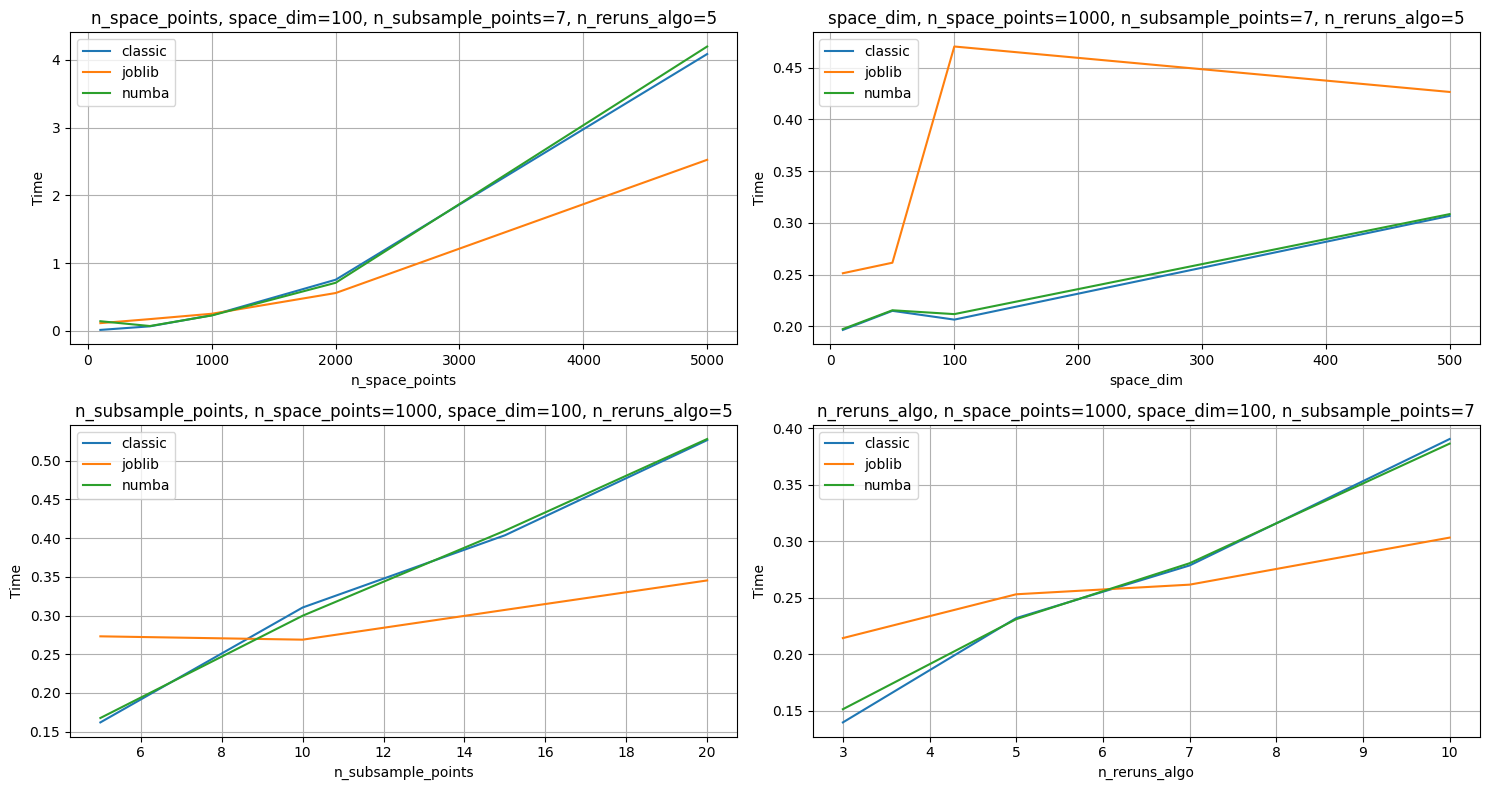

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
params = [ 'n_space_points', 'space_dim', 'n_subsample_points',  'n_reruns_algo',]

for param, ax in zip(params, axes.flatten()):
    for method in ['classic', 'joblib', 'numba']:
        results = pd.read_csv(f'results/{param}_{method}.csv')
        
        extra_params = results.iloc[0][params].drop(param)
        
        ax.plot(results[param], results['time_mean'], label=method)

    ax.set_title(param + form_param_string(extra_params))
    ax.set_xlabel(param)
    ax.set_ylabel('Time')
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()